### Import Liabraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

### Import data

In [92]:
data=pd.read_csv(r"C:\Users\m\Desktop\ML code\Final project\heart_failure_clinical_records_dataset.csv")

### Data Preprocessing 

In [93]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [95]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [96]:
data.shape

(299, 13)

<Axes: >

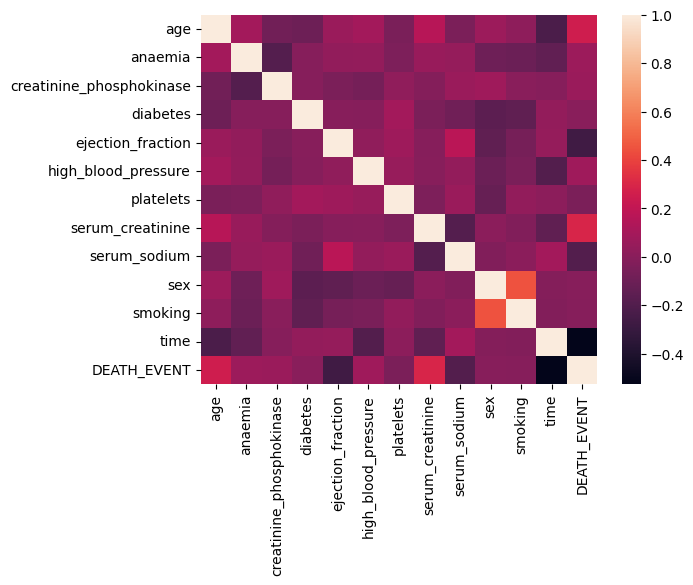

In [97]:
corr=data.corr()
sns.heatmap(corr)

In [98]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [99]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [100]:
data.duplicated().sum()

0

### Removing Outliers

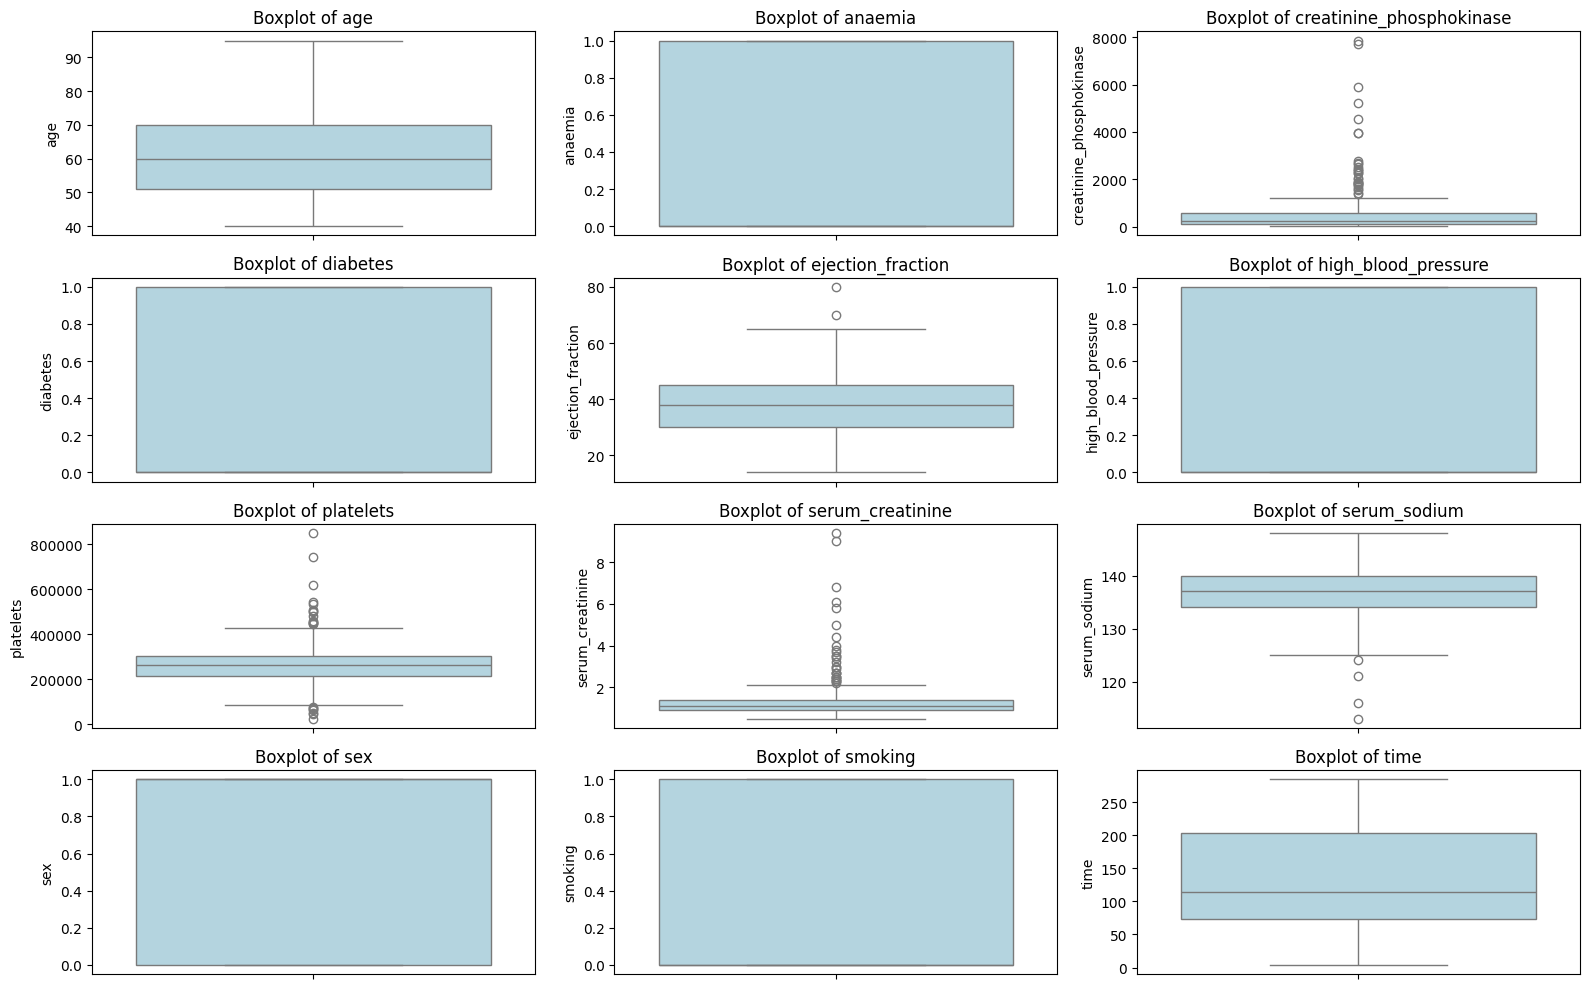

In [101]:
numeric_cols = data.select_dtypes(include='number').columns
numeric_cols = numeric_cols.drop('DEATH_EVENT')
plt.figure(figsize=(16, 10))
for i, col in enumerate(data[numeric_cols].columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=data, y=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [102]:
# drop outliers using Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
# shape before dropping outliers
print("Shape before dropping outliers:", data.shape)
data = data[(z_scores < 3).all(axis=1)]
# shape after dropping outliers
print("Shape after dropping outliers:", data.shape)

Shape before dropping outliers: (299, 13)
Shape after dropping outliers: (280, 13)


### Splitting Data

In [103]:
x=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(266, 12)
(266,)
(14, 12)
(14,)


In [104]:
print(np.bincount(y))

[194  86]


### Applying PCA

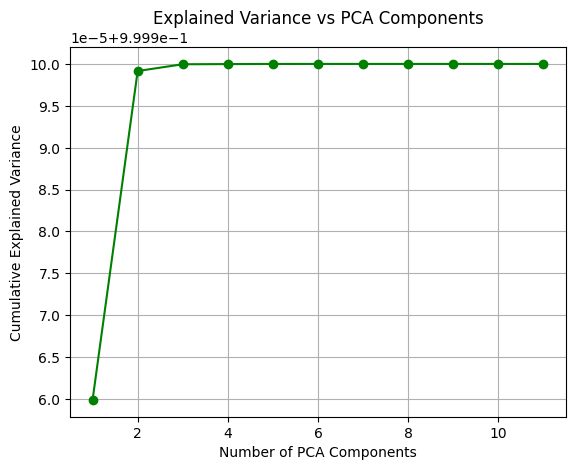

In [105]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

scores = []
n_components_list = range(1, 12) 

for n in n_components_list:
    pca = PCA(n_components=n)
    pca.fit(x_train)
    variance = np.sum(pca.explained_variance_ratio_)
    scores.append(variance)

# رسم التباين المفسَّر
plt.plot(n_components_list, scores, marker='o', color='green')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs PCA Components")
plt.grid(True)
plt.show()


In [106]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

print(x_train_pca.shape)
print(x_test_pca.shape)

(266, 6)
(14, 6)


### Standard Normalization

In [107]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# MODEL

# Logistic regression

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.50      0.50      0.50         2

    accuracy                           0.86        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.86      0.86      0.86        14



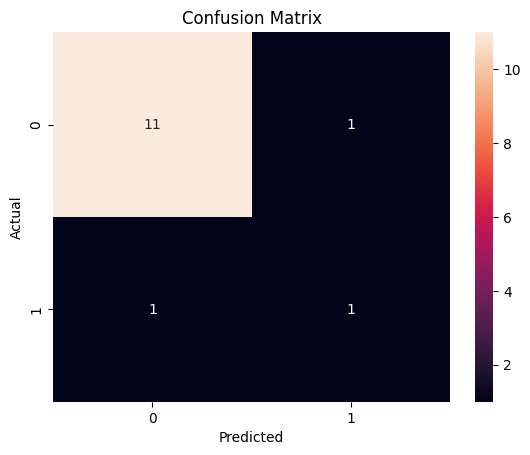

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model_LR=LR=LogisticRegression(max_iter=500,solver='liblinear')
LR.fit(x_train,y_train)

y_pred = model_LR.predict(x_test)
cr=classification_report(y_test,y_pred)
print(cr)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# SVM

Best Parameters: {'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.50      0.50      0.50         2

    accuracy                           0.86        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.86      0.86      0.86        14



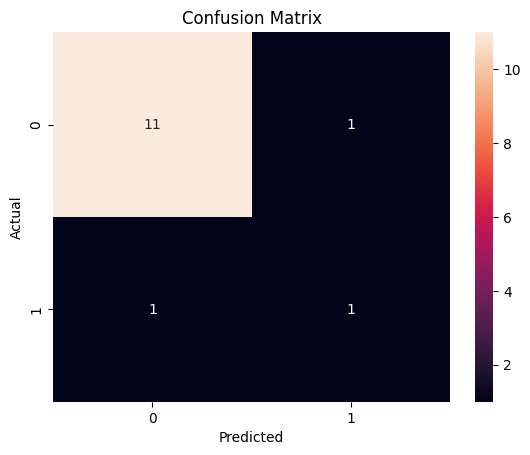

In [109]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the base model
model = SVC()

# Define the parameter grid to search
params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [1, 0.1, 10]
}

grid = GridSearchCV(model, params)
grid.fit(x_train, y_train)
y_pred = grid.best_estimator_.predict(x_test)
print("Best Parameters:", grid.best_params_)

cr=classification_report(y_test,y_pred)
print(cr)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# naive bayes

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.50      0.67         2

    accuracy                           0.93        14
   macro avg       0.96      0.75      0.81        14
weighted avg       0.93      0.93      0.92        14



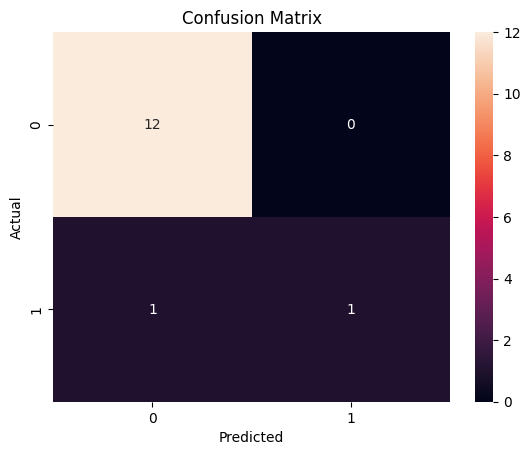

0.9285714285714286


In [110]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)
y_predict = model_nb.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cr=classification_report(y_test,y_predict)
print(cr)
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
acc=accuracy_score(y_test,y_predict)
print(acc)

# KNN

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.50      0.50      0.50         2

    accuracy                           0.86        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.86      0.86      0.86        14



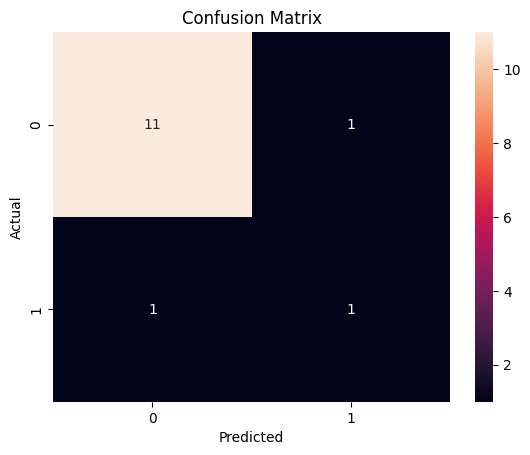

0.8571428571428571


In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_predict=knn.predict(x_test)

cr=classification_report(y_test,y_predict)
print(cr)
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
acc=accuracy_score(y_test,y_predict)
print(acc)

# MLP

### Without PCA

In [112]:
from tensorflow.keras import layers
import keras
model_MLP=keras.Sequential([
    layers.Dense(64, activation='relu',input_shape=(12,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

model_MLP.compile(
    loss='binary_crossentropy', 
    optimizer='adam',
    metrics=['accuracy'])
    

model_MLP.fit(x_train,y_train,epochs=10, batch_size=32,callbacks=[early_stop],validation_data=(x_test,y_test))


Epoch 1/10
9/9 [==============================] - 2s 42ms/step - loss: 0.6590 - accuracy: 0.6842 - val_loss: 0.5880 - val_accuracy: 0.7143
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 0.6100 - accuracy: 0.7331 - val_loss: 0.5547 - val_accuracy: 0.7143
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 0.5730 - accuracy: 0.7481 - val_loss: 0.5156 - val_accuracy: 0.8571
Epoch 4/10
9/9 [==============================] - 0s 10ms/step - loss: 0.5347 - accuracy: 0.7444 - val_loss: 0.4971 - val_accuracy: 0.7857
Epoch 5/10
9/9 [==============================] - 0s 11ms/step - loss: 0.4991 - accuracy: 0.7782 - val_loss: 0.4731 - val_accuracy: 0.7857
Epoch 6/10
9/9 [==============================] - 0s 12ms/step - loss: 0.4660 - accuracy: 0.7970 - val_loss: 0.4626 - val_accuracy: 0.7143


### With PCA

In [113]:
from tensorflow.keras import layers
import keras
model=keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(6,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

model.compile(
    loss='binary_crossentropy', 
    optimizer='adam',
    metrics=['accuracy'])

model.fit(x_train_pca,y_train,epochs=50,batch_size=32,callbacks=[early_stop],validation_data=(x_test_pca,y_test))

Epoch 1/50
9/9 [==============================] - 2s 46ms/step - loss: 736.5561 - accuracy: 0.5526 - val_loss: 27.8050 - val_accuracy: 0.5000
Epoch 2/50
9/9 [==============================] - 0s 10ms/step - loss: 344.0143 - accuracy: 0.5827 - val_loss: 261.0947 - val_accuracy: 0.5000
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 133.5921 - accuracy: 0.5113 - val_loss: 50.1546 - val_accuracy: 0.8571
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 90.3221 - accuracy: 0.5865 - val_loss: 76.4374 - val_accuracy: 0.5000
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 72.0189 - accuracy: 0.5977 - val_loss: 26.8320 - val_accuracy: 0.8571
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 84.3179 - accuracy: 0.5414 - val_loss: 49.1878 - val_accuracy: 0.8571


# AdaBoost

# DecisionTree

### Without PCA

In [114]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

stump = DecisionTreeClassifier(max_depth=1,
                               class_weight='balanced')

Boost = AdaBoostClassifier(n_estimators=50,
                           estimator=stump,
                           learning_rate=1)

model_DT = Boost.fit(x_train, y_train)

y_pred = model_DT.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.50      0.50      0.50         2

    accuracy                           0.86        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.86      0.86      0.86        14



In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.50      1.00      0.67         2

    accuracy                           0.86        14
   macro avg       0.75      0.92      0.79        14
weighted avg       0.93      0.86      0.87        14



In [116]:
import lightgbm as lgb
from sklearn.metrics import classification_report

lgb_model = lgb.LGBMClassifier(num_leaves=31, n_estimators=100, class_weight='balanced', random_state=42)

lgb_model.fit(x_train, y_train)

y_pred = lgb_model.predict(x_test)
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 84, number of negative: 182
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 266, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

### With PCA

In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics

Boost = AdaBoostClassifier(n_estimators=50, learning_rate=0.01)
model = Boost.fit(x_train_pca, y_train)

y_pred = model.predict(x_test_pca)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.50      0.50      0.50         2

    accuracy                           0.86        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.86      0.86      0.86        14



In [118]:
import gradio as gr

def binary(val):
    return 1 if val in ["Yes", "Male"] else 0

def predict(model_choice, age, anaemia, cpk, diabetes, ef, hbp, platelets,
            serum_creatinine, ss, sex, smoking, time):
    
    anaemia = binary(anaemia)
    diabetes = binary(diabetes)
    hbp = binary(hbp)
    sex = binary(sex)
    smoking = binary(smoking)

    x = np.array([[age, anaemia, cpk, diabetes, ef, hbp, platelets,
                   serum_creatinine, ss, sex, smoking, time]])
    
    x_scaled = scaler.transform(x)

    if model_choice == "Logistic Regression":
        model = model_LR
        prob = model.predict_proba(x_scaled)[0][1]
    elif model_choice == "Decision Tree":
        model = model_DT
        prob = model.predict_proba(x_scaled)[0][1]
    else: 
        model = model_nb
        prob = model.predict_proba(x_scaled)[0][1]
    
    pred = int(prob > 0.5)
    return f"""Prediction: {'DEATH' if pred == 1 else 'SURVIVE'}
Probability of risk: {prob*100:.2f}%
Model used: {model_choice}"""

inputs = [
    gr.Radio(["Logistic Regression", "Decision Tree", "naive bayes"], label="Select Model", value="naive bayes"), 
    gr.Slider(30, 100, value=60, label="Age"),
    gr.Radio(["No", "Yes"], label="Anaemia", value="No"),
    gr.Slider(20, 8000, value=250, label="Creatinine Phosphokinase"),
    gr.Radio(["No", "Yes"], label="Diabetes", value="No"),
    gr.Slider(10, 80, value=40, label="Ejection Fraction"),
    gr.Radio(["No", "Yes"], label="High Blood Pressure", value="No"),
    gr.Slider(25000, 850000, value=250000, label="Platelets"),
    gr.Slider(0.1, 10.0, value=1.0, label="Serum Creatinine"),
    gr.Slider(110, 150, value=135, label="Serum Sodium"),
    gr.Radio(["Female", "Male"], label="Sex", value="Male"),
    gr.Radio(["No", "Yes"], label="Smoking", value="No"),
    gr.Slider(0, 300, value=100, label="Follow-up Time (days)"),
]

iface = gr.Interface(
    fn=predict,
    inputs=inputs,
    outputs="text",
    title="Heart Failure Risk Predictor",
    description="Enter patient data and choose model"
)

iface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7867

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
